In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from utils import load_mnist
from trainer import Trainer

In [4]:
def show_image(x):
    if x.dim() == 1:
        x = x.view(int(x.size(0) ** .5), -1)
        
    plt.imshow(x, cmap='gray')
    plt.show()

In [5]:
from argparse import Namespace

config = {
    'train_ratio': .8,
    'batch_size': 256,
    'n_epochs': 50,
    'verbose': 1,
    'btl_size':2
}

config = Namespace(**config)
print(config)

Namespace(batch_size=256, btl_size=2, n_epochs=50, train_ratio=0.8, verbose=1)


In [7]:
train_x, train_y = load_mnist(flatten=True)
test_x, test_y = load_mnist(is_train=False, flatten=True)

train_cnt = int(train_x.size(0) * config.train_ratio)
valid_cnt = train_x.size(0) - train_cnt

indices = torch.randperm(train_x.size(0))
train_x, valid_x = torch.index_select(train_x, dim=0, index=indices).split([train_cnt, valid_cnt], dim=0)
train_y, valid_y = torch.index_select(train_y, dim=0, index=indices).split([train_cnt, valid_cnt], dim=0)

print('Train', train_x.shape, train_y.shape)
print('Valid', valid_x.shape, valid_y.shape)
print('Test', test_x.shape, test_y.shape)

Train torch.Size([48000, 784]) torch.Size([48000])
Valid torch.Size([12000, 784]) torch.Size([12000])
Test torch.Size([10000, 784]) torch.Size([10000])


In [8]:
from model import Autoencoder

In [9]:
model = Autoencoder(btl_size=config.btl_size)
optimizer = optim.Adam(model.parameters())
crit = nn.MSELoss()

trainer = Trainer(model, optimizer, crit)

In [11]:
trainer.train((train_x, train_x), (valid_x, valid_x), config)

Epoch(1/50): train_loss=7.2724e-02  valid_loss=4.8715e-02  lowest_loss=4.8715e-02
Epoch(2/50): train_loss=4.6748e-02  valid_loss=4.4309e-02  lowest_loss=4.4309e-02
Epoch(3/50): train_loss=4.3887e-02  valid_loss=4.2091e-02  lowest_loss=4.2091e-02
Epoch(4/50): train_loss=4.2752e-02  valid_loss=4.1148e-02  lowest_loss=4.1148e-02
Epoch(5/50): train_loss=4.1959e-02  valid_loss=4.0945e-02  lowest_loss=4.0945e-02
Epoch(6/50): train_loss=4.1140e-02  valid_loss=3.9975e-02  lowest_loss=3.9975e-02
Epoch(7/50): train_loss=4.0564e-02  valid_loss=3.9094e-02  lowest_loss=3.9094e-02
Epoch(8/50): train_loss=4.0505e-02  valid_loss=3.9628e-02  lowest_loss=3.9094e-02
Epoch(9/50): train_loss=4.0115e-02  valid_loss=3.9042e-02  lowest_loss=3.9042e-02
Epoch(10/50): train_loss=3.9937e-02  valid_loss=3.8537e-02  lowest_loss=3.8537e-02
Epoch(11/50): train_loss=3.9501e-02  valid_loss=3.9045e-02  lowest_loss=3.8537e-02
Epoch(12/50): train_loss=3.9396e-02  valid_loss=3.8579e-02  lowest_loss=3.8537e-02
Epoch(13/50):

## Mean value in each space

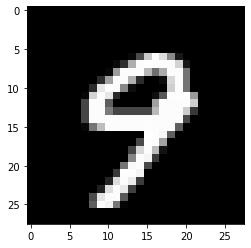

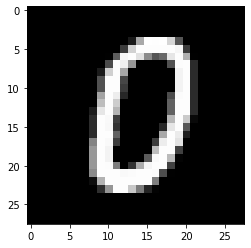

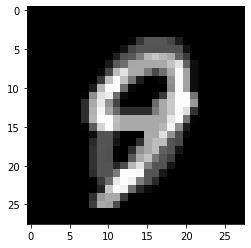

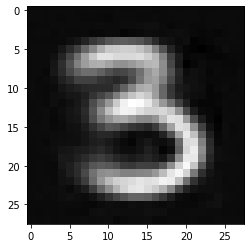

In [13]:
with torch.no_grad():
    import random
    
    index1 = int(random.random() * test_x.size(0))
    index2 = int(random.random() * test_x.size(0))
    
    z1 = model.encoder(test_x[index1].view(1,-1))
    z2 = model.encoder(test_x[index2].view(1,-1))
    
    recon = model.decoder((z1 + z2) / 2).squeeze()
    
    show_image(test_x[index1])
    show_image(test_x[index2])
    show_image(test_x[index1] + test_x[index2] / 2)
    show_image(recon)